In [14]:
# Invocamos la magia con una de las opciones
%matplotlib notebook
# Importamos la librería
import matplotlib as mpl
print(mpl.__version__)
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
#print(sorted(mpl.style.available))
plt.style.use('classic')

3.0.3


In [30]:
# en este bloque se calculan los puntos que contendra la malla 
# y se almacenan en una estructura de puntos*3
Largoy=4
Largox=2
Largoz=2
H= float(input('Ingrese dato: '))
puntosx=(Largox/H)+1
puntosy=(Largoy/H)+1
puntosz=(Largoz/H)+1
puntos=puntosx*puntosy*puntosz
while ((puntos % 1) != 0):
    print ("ATENCIÓN: ingrese un paso valido.")
    H= float(input('Ingrese dato: '))
    puntos=((Largoy/H)+1)*((Largox/H)+1)*((Largoz/H)+1)
    puntosx=(Largox/H)+1
    puntosy=(Largoy/H)+1
    puntosz=(Largoz/H)+1
puntos=int(puntos)
x = [[H*x, H*y, H*z] for y in range(int(puntosy)) for z in range(int(puntosz)) for x in range(int(puntosx)) ]
l=np.array(x, dtype=np.float32)
puntos_ul=(puntosx*puntosz) # cantidad de puntos por placa
#l.ndim
#type(l)
#l[int(puntos-puntos_ul):int(puntos),0]

    



Ingrese dato: 1


<IPython.core.display.Javascript object>


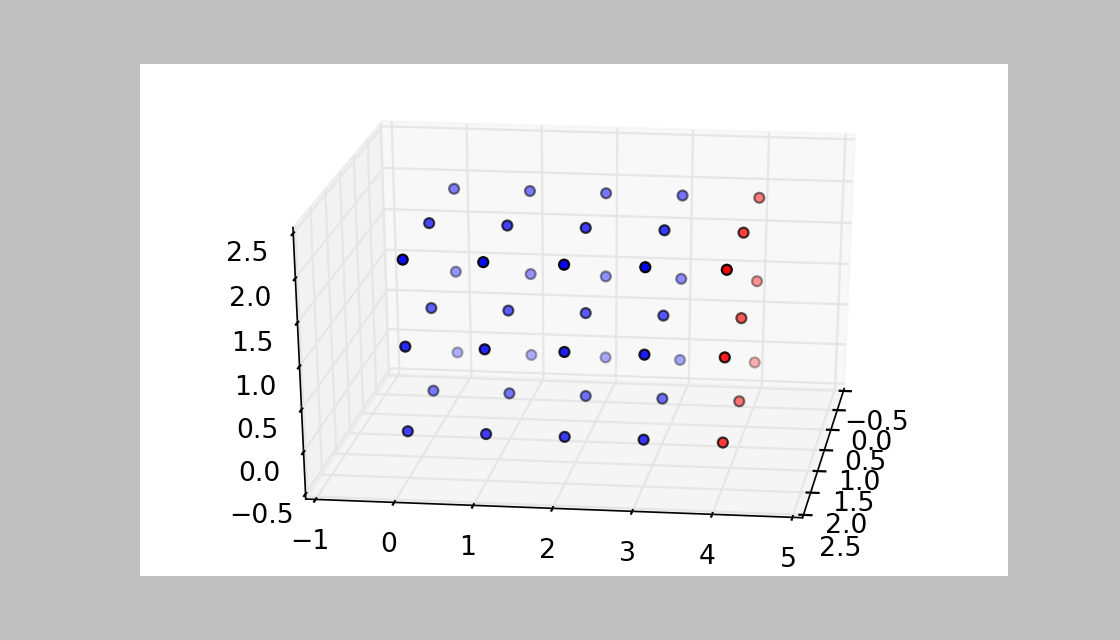

In [16]:

fig, ax = plt.subplots(figsize=(7, 4), subplot_kw={'projection': '3d'})


ax.scatter(l[0:int(puntos-puntos_ul),0],l[0:int(puntos-puntos_ul),1],l[0:int(puntos-puntos_ul),2])
ax.scatter(l[int(puntos-puntos_ul):int(puntos),0],l[int(puntos-puntos_ul):int(puntos),1],l[int(puntos-puntos_ul):int(puntos),2],c='red')
# ax.scatter(rho*np.cos(phi), rho*np.sin(phi), np.linspace(0, 2, num=N))

In [62]:
matriz = np.zeros((puntos,puntos))
matriz[1,2]
vectorb=np.zeros((puntos,1))




In [85]:
l=0

for j in range(int(puntosy)):
    for k in range (int(puntosz)):
        for i in range(int(puntosx)):
            #print(i,j,k)
            if(j==0):
                un=i+k*puntosx+puntos_ul
                do=(i+k*puntosx)
                matriz[l,int(un)]=1/H
                matriz[l,int(do)]=-1/H
            
            if j<int(puntosy-1) and j!=0:
                # Se calcula el indice en el arreglo de los puntos vecinos del actual desde (i,j,k)--> valorlineal
                actual=i+k*puntosx+j*puntos_ul
                ymas=actual+puntos_ul
                ymenos=actual-puntos_ul
                xmas=actual+1
                xmenos=actual-1
                zmas=actual+puntosx
                zmenos=actual-puntosx
                # Se completa en la matriz los coeficientes de las variables pertenecientes a el valor actual
                matriz[l,int(actual)]=-6
                # Se completa en la matriz los coeficientes de las variables pertenecientes a los vecinos en y
                matriz[l,int(ymenos)]=1
                matriz[l,int(ymas)]=1
                # Se completa en la matriz los coeficientes de las variables pertenecientes a los vecinos en x
                if(i!=puntosx-1):
                    matriz[l,int(xmas)]=1
                if(i!=0):
                    matriz[l,int(xmenos)]=1
                 # Se completa en la matriz los coeficientes de las variables pertenecientes a los vecinos en z
                if(k!=puntosz-1):
                    matriz[l,int(zmas)]=1
                if(k!=puntosz-1): 
                    matriz[l,int(zmenos)]=1
            
            if j==puntosy-1:
                actual=i+k*puntosx+j*puntos_ul
                matriz[l,int(actual)]=1
            l=l+1


        

In [86]:
matriz

array([[-1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., -1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., -1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

17.0

0.0